In [283]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../../")
import cmcrameri
from matplotlib.colors import LogNorm
import scienceplots
from uq import GaussianUQMeasure
from models import NormalCRPS, SquaredError, GaussianKernelScore, NLL
import torch

# Analyze task adaptive loss

In [343]:
measures = measures = ["log", "var", "crps", "kernel"]
losses = ["log", "se","crps", "kernel"]
gamma = 1.0
names = [r"$S_\mathrm{log}$",r"$S_\mathrm{SE}$",r"$S_\mathrm{ES}$",r"$S_{k_\gamma}$"]

In [344]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [345]:
plt.style.use(['science', 'grid'])
labelsize = 20
ticksize = 18
legendsize = 22

# TU

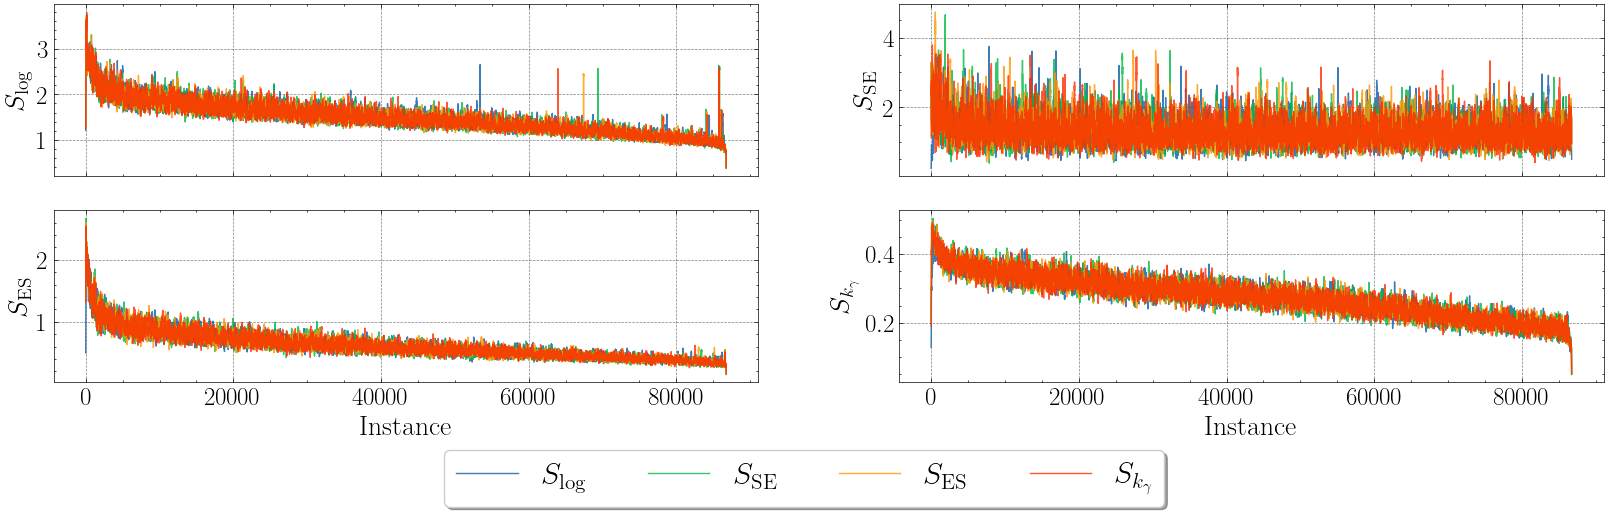

In [354]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(tu, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8)
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.25)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_tu.pdf", bbox_inches = "tight")

# EU

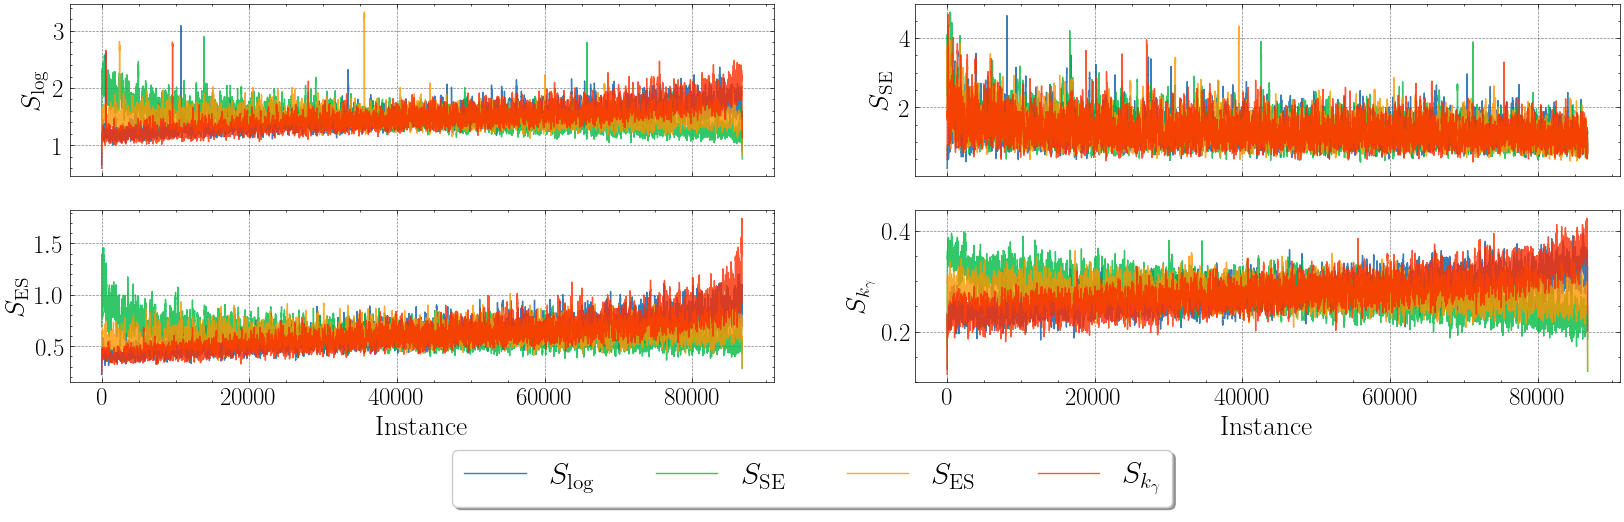

In [355]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(eu, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8)
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.25)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_eu.pdf", bbox_inches = "tight")

# AU

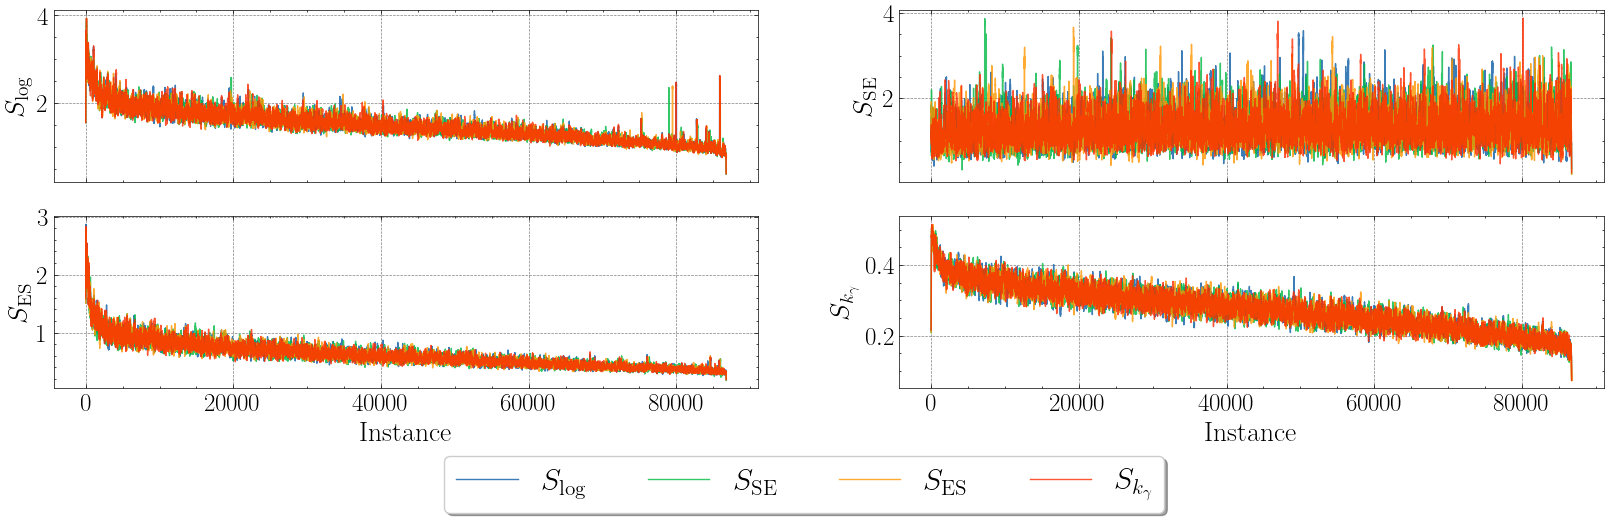

In [356]:
fig, axs = plt.subplots(2,2, figsize = (20,6), sharex = True)
axs = axs.ravel()
handles = []

for i,metric in enumerate(losses):
    result = np.load(f"../../results/active_learning/{metric}/pred.npy")
    result_tensor = torch.permute(torch.tensor(result), (1,2,0))
    result_tensor[:,0] = result_tensor[:,0]
    task_loss = np.load(f"../../results/active_learning/{metric}/{metric}.npy")

    mu = result_tensor[:,0:1].mean(dim = -1)
    sigma = torch.sqrt(result_tensor[:,1:2].mean(dim = -1) + torch.var(result_tensor[:,0:1], dim = -1))
    pred = torch.cat([mu, sigma], dim = 1)
    for m,measure in enumerate(measures):
        au, eu, tu = GaussianUQMeasure(result_tensor, gamma = gamma).get_uncertainties(measure)
        indices = torch.argsort(au, descending = True)
        im, = axs[i].plot(movingaverage(task_loss[indices][:,0],50), label = names[m], alpha = 0.8)
        handles.append(im)

    axs[i].set_ylabel(names[i], fontsize = labelsize)
    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)

axs[2].set_xlabel("Instance", fontsize = labelsize)
axs[3].set_xlabel("Instance", fontsize = labelsize)

# axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23),
#         fancybox=True, shadow=True, ncol=4, fontsize = legendsize)

# Legend
fig.subplots_adjust(bottom=0.25)
fig.legend(labels = names, handles = handles[0:4], loc='lower center', ncol = 4, fontsize = legendsize, fancybox = True, shadow = True)

plt.savefig("../../plots/task_adaption_au.pdf", bbox_inches = "tight")

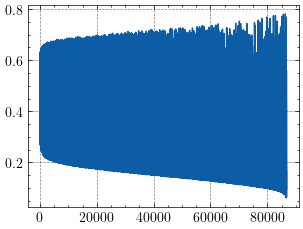

In [349]:
plt.plot(task_loss[indices])

In [288]:
def get_mean_std(array):
    mean = array[...,0].mean(axis = 0)
    std = np.sqrt(array[...,1].mean(axis = 0))
    return mean, std

In [289]:
var.shape

NameError: name 'var' is not defined

In [ ]:
plt.style.use('science')
labelsize = 25
ticksize = 20
legendsize = 18
lw = 2

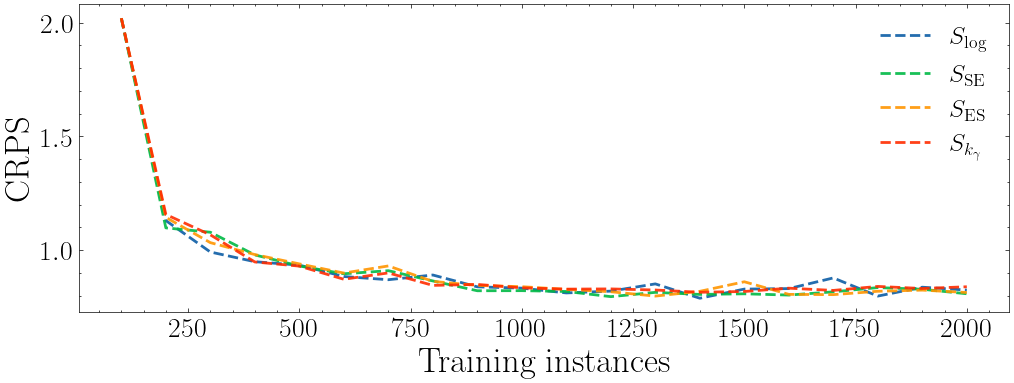

In [ ]:
fig, axs = plt.subplots(1,1, figsize = (12,4))

for i,m in enumerate(methods):
    mean, std = get_mean_std(m)
    axs.plot(inst, mean, label = names[i], lw = lw, alpha = 0.9, ls="--")
    #axs.fill_between(inst, mean-std, mean+std, alpha=0.1)
axs.xaxis.set_tick_params(labelsize=ticksize)
axs.yaxis.set_tick_params(labelsize=ticksize)
axs.set_xlabel("Training instances", size = labelsize)
axs.set_ylabel("CRPS", size = labelsize)
plt.legend(fontsize = legendsize)

plt.savefig(f"../../plots/al_comparison.pdf", bbox_inches = "tight")

# Analyze kernel scores

In [ ]:
gamma = [0.1,1.0]

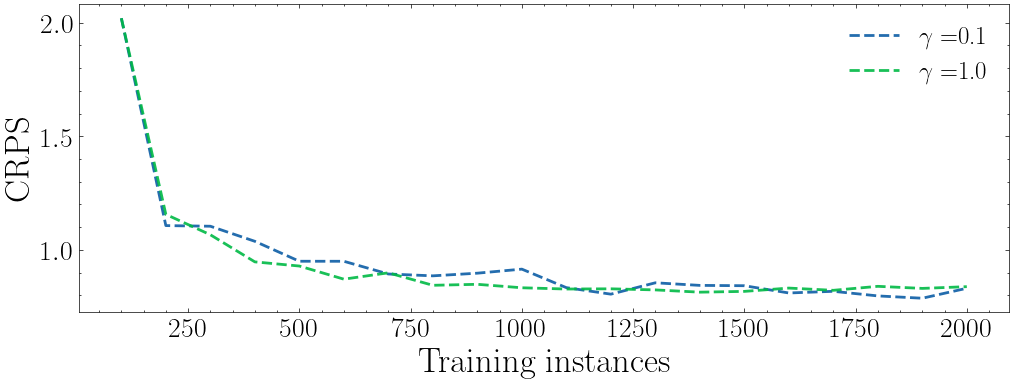

In [ ]:
fig, axs = plt.subplots(1,1, figsize = (12,4))

for i,m in enumerate(gamma):
    method = np.load(f"../../results/active_learning/kernel_tuning/kernel_{m}.npy")
    mean = method[:,0]
    axs.plot(inst, mean, label = rf"$\gamma=${m}", lw = lw, alpha = 0.9, ls="--")
    #axs.fill_between(inst, mean-std, mean+std, alpha=0.1)
axs.xaxis.set_tick_params(labelsize=ticksize)
axs.yaxis.set_tick_params(labelsize=ticksize)
axs.set_xlabel("Training instances", size = labelsize)
axs.set_ylabel("CRPS", size = labelsize)
plt.legend(fontsize = legendsize)